# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient develops coronary heart disease (CHD) within a 10-year period.The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

You can read more about the data and the variables [here](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression).

In [3]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [4]:
# Question 1 code here
df = pd.read_csv('framingham.csv').dropna()
# For this assignment, we are dropping any rows that have missing data.
# THIS IS GENERALLY A BAD IDEA. We will discuss alternatives later in the course.

# Code below to display first 5 rows
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the official assignment solution.

In [5]:
# Question 2 code here.

# Don't use the "TenYearCHD" as a feature
X = df.drop('TenYearCHD', axis='columns')
print(df.head())
y = df['TenYearCHD']
# Splitting code here
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.50,random_state=0)
print("Xtrain: {}\n".format(Xtrain))
print("Xtest: {}\n".format(Xtest))
print("ytrain: {}\n".format(ytrain))
print("ytest: {}\n".format(ytest))

   male  age  education currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0             0         0.0     0.0                0   
1     0   46        2.0             0         0.0     0.0                0   
2     1   48        1.0             F        20.0     0.0                0   
3     0   61        3.0             F        30.0     0.0                0   
4     0   46        3.0             F        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2       

/var/folders/r7/0466q4hd5kn0v88f66f9yhyc0000gn/T/ipykernel_51605/1095623997.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'F' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x=df.loc[df['currentSmoker']==1, 'currentSmoker'] = 'F'


## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

Yes it does, it uses the L2 or "Ridge" penalty by default.

* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

If we apply a penalty I expect to see much lower resulting coefficients, coming much closer to zero than without a penalty. Additionally, I do not expect to see model overfitting as this regularization attempts to balance coefficients so none of the features are eliminated. 

* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

No, I should not because LogisticRegression in sklearn already adds an intercept term (a column of ones) to the data by default as the fit_intercept parameter is true by default.

## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.

Using this object, **run a logisitic regression analysis** of `TenYearCHD` (y-variable) against `totChol` (x-variable) using your training data. 

Then **make a plot with three main components based on the analysis**:
1. Scatter-plot of `totChol` and `TenYearCHD` on your test data
2. A curve showing the prediction (0 or 1, using `predict` - this curve will jump between 0 and 1) as a function of `totChol`
3. A curve showing the predicted probability of a positive outcome (using `predict_proba`) as a function of `totChol`. Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1) in an array.

(3656,)
(3656,)
(1828,)
(1828,)
(1828,)


<Axes: xlabel='totChol'>

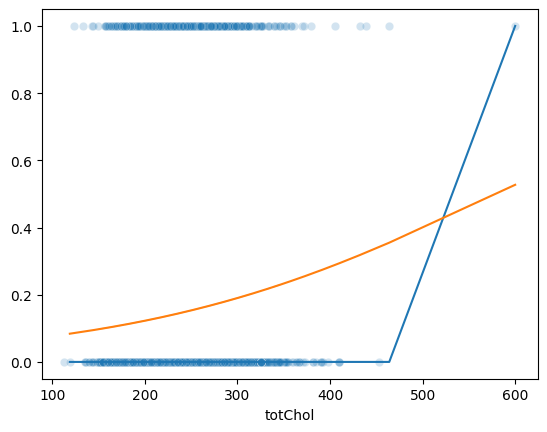

In [22]:
# Question 4 code here.
# Assign appropriate values to xscater, yscatter (x and y coordinates for scatter plot)
xscatter = df['totChol'].to_numpy()
print(xscatter.shape)
yscatter = df['TenYearCHD'].to_numpy()
print(yscatter.shape)

lrInstance = LogisticRegression(penalty=None)
lrInstance.fit(Xtrain[['totChol']],ytrain)

# xline (x coordinates for plot of prediction)
xline = Xtest['totChol']
print(xline.shape)

# yline_label (y coordinates for plot of predicted label)
yline_label = lrInstance.predict(Xtest[['totChol']])
print(yline_label.shape)

# yline_prob (y coordinates for plot of predicted probability)
yline_prob = lrInstance.predict_proba(Xtest[['totChol']])[:,1]
print(yline_prob.shape)

# Plotting code provided
# xscatter, yscatter, xline, yline1, yline2 must all be 1D arrays
ax = sns.scatterplot(x=xscatter,y=yscatter,alpha=0.2) #Plot data
sns.lineplot(x=xline,y=yline_label) # Plot line indicating label
sns.lineplot(x=xline,y=yline_prob) # Plot line indicating probability

## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your totChol-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

TP + FP = 1 + 0 = 1

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

It may be a false positive.

* Is this classifier useful for finding specific individuals who will develop CHD? Explain in one or two sentences.

Yes, it is somewhat useful because the accuracy threshold given was 0.5 and the accuracy of the classifier is 0.842. However, while precision and specificity are high, sensitivity is extremely low, which means the classifier is not that good.

In [29]:
# Calculate performance measures from scratch - provided function
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:
ynp = lrInstance.predict_proba(Xtest['totChol'].to_numpy().reshape(-1,1))
print(ynp.shape)
Ynp = np.where(ynp[:, 1] > 0.5, 1, 0)
ytnp = ytest.to_numpy()

cnp = compute_performance(Ynp, ytnp, classes = [0,1])
print()

## Put code here to compute whatever else you might need to answer the question.




(1828, 2)
tp: 1 tn: 1538 fp: 0 fn: 289
Accuracy: 0.842 Recall: 0.003 Precision: 1.0 Sensitivity: 0.003 Specificity: 1.0



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame (except for `TenYearCHD`) in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Age more strongly associated with CHD, if all other variables are held equal?

**YOUR ANSWER HERE:**

In [ ]:
# Code for Question 6
lrFit = LogisticRegression(penalty='l2', max_iter=1000)
lrFit.fit(Xtrain,ytrain)

print('Intercept: {}\nCoefficients: {}'.format(lrFit.intercept_, lrFit.coef_))

Intercept: [-8.81588099]
Coefficients: [[ 4.91411759e-01  6.29230984e-02 -1.52725574e-03  4.36925395e-02
   1.70292499e-02  4.76047153e-01  8.27762634e-01  1.08694793e-01
  -1.69305705e-01  2.03583571e-03  1.70961438e-02  1.00209804e-03
   9.72231929e-05 -3.71817328e-03  8.48231480e-03]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

TP + FP = 24 + 22 = 46

* Is this classifier **better or worse than the amount-only classifier** for finding individuals likely to develop CHD? Explain in one or two sentences.*

This classifier with the l2 penalty is better than the other with no penalty despite having similar metrics all around. However, there are many more true positives identified using this method.

Accuracy: 0.842 Recall: 0.003 Precision: 1.0 Sensitivity: 0.003 Specificity: 1.0
Accuracy: 0.842 Recall: 0.083 Precision: 0.522 Sensitivity: 0.083 Specificity: 0.986

In [33]:
# Code for Question 7
yp = lrFit.predict_proba(Xtest)
Yp = np.where(yp[:, 1]>0.5, 1, 0)

cp = compute_performance(Yp, ytnp, classes = [0,1])
print()

tp: 24 tn: 1516 fp: 22 fn: 266
Accuracy: 0.842 Recall: 0.083 Precision: 0.522 Sensitivity: 0.083 Specificity: 0.986



# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

The second model using the l2 penalty has a higher estimated probability of correctly distinguishing positive from negative because the AUROC curve of that model is closer to the upper left corner. This means that the closer it is to that corner, the better the true positive rate.

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

An AUROC worse than random may be the result of incorrect labelling or probabilities being used in the calculation. 

AUROC 1: 0.5730426886686696


Text(0.5, 1.0, 'ROC Curves (No Penalty Model)')

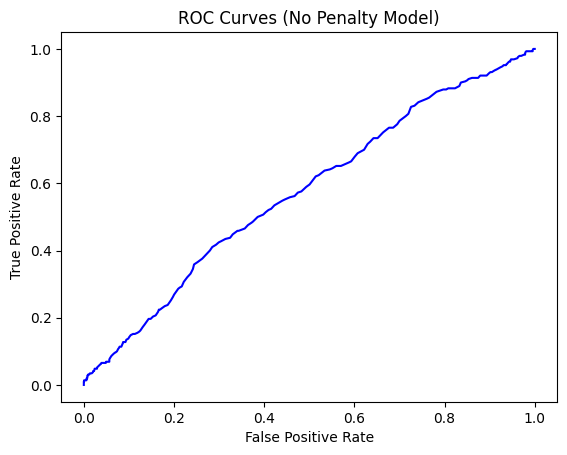

In [38]:
# ROC for totChol-only classifier
fpr1, tpr1, thresh = roc_curve(ytest,ynp[:,1])
roc_auc1 = auc(fpr1, tpr1)
print(f"AUROC 1: {roc_auc1}")
plt.plot(fpr1, tpr1, color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (No Penalty Model)')

AUROC 2: 0.7375835164342407


Text(0.5, 1.0, 'ROC Curves (L2 Penalty Model)')

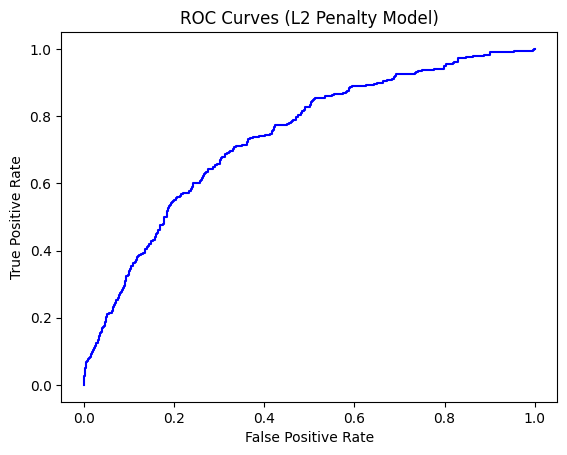

In [39]:
# ROC for all-variable classifier
fpr2, tpr2, thresh = roc_curve(ytest,yp[:,1])
roc_auc2 = auc(fpr2, tpr2)
print(f"AUROC 2: {roc_auc2}")
plt.plot(fpr2, tpr2, color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (L2 Penalty Model)')

# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 20% of future CHD cases?

*The model with all variables has a precision of about 0.4 at 0.2 recall, and the amount-only classifier has precision almost 0.2 at 0.2 recall, so the model with all variables is preferable.*


AUPRC 1: 0.20524608978628822


Text(0.5, 1.0, 'PRC Curves (No Penalty Model)')

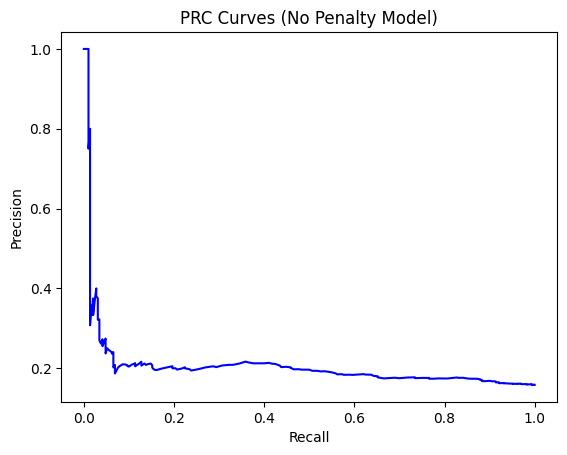

In [44]:
# PRC for totChol-only classifier
pre1, rec1, thresh = precision_recall_curve(ytest,ynp[:,1])
auprc1 = auc(rec1, pre1)
print(f"AUPRC 1: {auprc1}")
plt.plot(rec1, pre1, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PRC Curves (No Penalty Model)')

AUPRC 2: 0.35519127323855243


Text(0.5, 1.0, 'PRC Curves (L2 Penalty Model)')

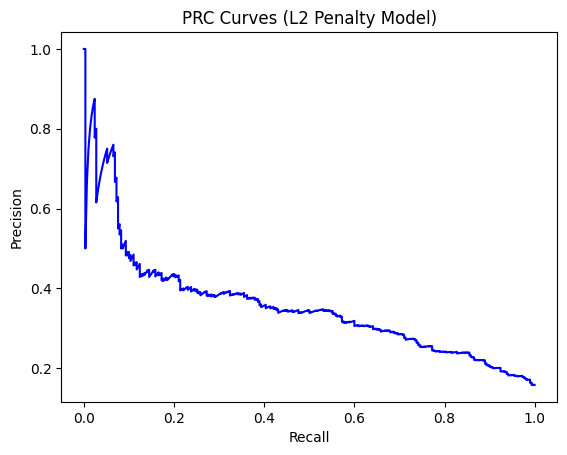

In [46]:
# PRC for all-variable classifier
pre2, rec2, thresh = precision_recall_curve(ytest,yp[:,1])
auprc2 = auc(rec2, pre2)
print(f"AUPRC 2: {auprc2}")
plt.plot(rec2, pre2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PRC Curves (L2 Penalty Model)')